# Model Selection, Underfitting and Overfitting

-------

The goal of machine learning is find a learning algorithm (algorithm that is able to learn from data) or simply model, train a model by adjusting the model parameters to get the best possible performance, both on the training (with minimum training error) and the test dat or new inputs (the trained model must be able to generalized well with minimum generalization error or test error) but the challenge in machine learning is how well does the trained model perform not just on the training data, but also on new unseen inputs (test inputs).This is a fundamental problem in machine learning between <b> optimization (the process of adjusting a model parameters to give the best possible performance on the training data) and generalization (how well does the trained model performs on newly unseen data) because a trained model can perform well well on the training dataset but performs poorly on newly unseen data points.</b>


# NOTE
------
<h3 style='color:blue'>The training error is the error of our model as calculated on the training dataset</h3>
<h3 style='color:blue'>The generalization error is the expected value of the error on a test or new data points drawn from the same underlying data distribution as our original sample</h3>


---
---

```
The factors determining how well a machine learning algorithm will perform are its ability to:
1. Make the training error small.
2. Make the gap between training and test error small.
These two factors correspond to the two central challenges in machine learning: underfitting and overfitting.

(source: From the book, Deep Learning by Ian Goodfellow,Yoshua Bengio and Aaron Courville, page 111) 
```

# Overftting

-------
When the complexity of the model is too high (highly flexible models) as compared to the underlying distribution of the data the model is trying to learn from, it tends to learn the noise present in data and is called overfitting. An Overfitted models has it training error much lower than validation error. <b>An overfitted model fails to Generalize well and has high Variance and Low Bias and the techniques used to combat overfitting are called regularization</b>.

# Underfitting
----
Underfitting occurs when the model can neither obtain sufficiently low error value on the training set nor generalize to new data and has low Variance and high Bias. Underfitted models are not able to reduce the training error. W

# Regularization
----

## Regularization are techniques used to combat overfitting  and this reduces the test error or generalization erro

```
 Regularization is any modification we make to a learning algorithm that is intended to reduce its generalization error 
 but not its training error
 
 (source: From the book, Deep Learning by Ian Goodfellow,Yoshua Bengio and Aaron Courville, page 120)
```

#  WEIGHT  REGULARIZATION
<img src='images/we.jpg'>
(source: From the book, Deep Learning by Ian Goodfellow,Yoshua Bengio and Aaron Courville, page 120)
<img src='images/weight.jpg'>
(source: From the book, Deep Learning with python by François Chollet, page 107)


# 1. Weight decay is also known as L2 regularization or ridge regression or Tikhonov regularization

<b>L2 regularization is also called weight decay in the context of neural networks</b> prevent the weights from growing too large unless it is really necessary. It can be realized by
adding a term to the cost OR objective function that penalizes large weights and is defined as

$$\tilde{\ell}(w)=\ell(w) + \frac{\lambda}{2}w^{2} $$

where $ \tilde{\ell}$ is the regularized cost fucbtion $\ell_{0}$ is an error measure (usually the sum of squared errors) and $\lambda$ is a hyperparameter chosen ahead of time that controls how weights are penalized. (weights the relative contribution of the norm penalty term $w^{2} $  relative to the standard objective function $\ell$)



with the corresponding parameter gradient
$$\bigtriangledown \tilde{\ell}_{w}(w)=\bigtriangledown \ell_{w}(w) + \lambda w $$

The new updated weight after an iteration can be expressed as
$$w=w-\eta \bigtriangledown\tilde{\ell}_{w}(w)=w-\eta(\lambda w +\bigtriangledown \ell_{w}(w)) $$

$$ w=(1- \eta\lambda) w -\eta \bigtriangledown \ell_{w}(w)) $$
where $\eta$ is the learning rate


The addition of the weight decay term has modified the learning rule of the weight vector by a constant factor on each step just before updating the weights

For linear regression, the objective function, sum of squared errors is defined as
$$e=(Xw-y)^{T}(Xw-y)$$

When L2 regularization is added, the objective function changes to
$$e=(Xw-y)^{T}(Xw-y)+ \frac{\lambda}{2}w^{2}$$

and this the solution $w$ from
$$ w=(XX^{T})^{-1}X^{T}y $$

$$ To$$

$$ w=(XX^{T}   + \lambda  I )^{-1}X^{T}y $$

Where the diagonal entries of this matrix $ \lambda  I $ correspond to the variance of each input feature

<img src='images/lp.jpg'>
 (source: From the book am using: Dive into Deep Learning by Aston Zhang, Zachary C. Lipton, Mu Li, and Alexander J. Smola page 155-156)

For more on the effects of weight regularization 
<a href='papers/563-a-simple-weight-decay-can-improve-generalization.pdf'>A Simple Weight Decay Can Improve Generalization by Anders Krogh and John A. Hertz</a>

# High-Dimensional Linear Regression

In [1]:
import d2l
from mxnet import gluon, npx,np,init,autograd
from mxnet.gluon import nn
import mxnet
import matplotlib.pyplot as plt
%matplotlib inline
npx.set_np()

<img src='images/highp.jpg'>
(source: From the book am using: Dive into Deep Learning by Aston Zhang, Zachary C. Lipton, Mu Li, and Alexander J. Smola page 156)

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b=np.zeros((num_inputs,1))*0.01,0.05

In [3]:
features, labels= d2l.synthetic_data(true_w, true_b, n_train)
x_test,y_test = d2l.synthetic_data(true_w, true_b, n_test)
train_iter = d2l.load_array((features, labels), batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

# Initializing Model Parameters

In [4]:
def init_params():
    w=np.random.normal(scale=0.01,size=(num_inputs,1))
    b= np.zeros(1)
    w.attach_grad()
    b.attach_grad()
    return [w,b]
w, b = init_params()

In [5]:
def l2_regularizer(y_hat, y,w,lambd=2):
    error=(y_hat - y.reshape(y_hat.shape)) ** 2 / 2
    l2_penalty=(lambd*(w**2)).sum() / 2
    return error +l2_penalty   

In [6]:
lr = 0.01 # Learning rate
num_epochs = 20# Number of iterations
batch_size=5
for epoch in range(num_epochs):
    net = lambda X: d2l.linreg(X, w, b)
    for X,y in train_iter:
        with autograd.record():
            y_hat=net(X)
            loss=l2_regularizer(y_hat,y,w)# Minibatch loss in X and y
        loss.backward() # Compute gradient on l with respect to [w, b]
        d2l.sgd([w, b], lr, batch_size)
    train_l = l2_regularizer(net(features), labels,w)
    test_l = l2_regularizer(net(x_test), y_test,w)
    print('epoch %d, training loss %f, test loss%f' % (epoch + 1, train_l.mean().asnumpy(),test_l.mean().asnumpy()))

epoch 1, training loss 0.017647, test loss0.027692
epoch 2, training loss 0.013631, test loss0.023313
epoch 3, training loss 0.011132, test loss0.019872
epoch 4, training loss 0.009309, test loss0.017058
epoch 5, training loss 0.007876, test loss0.014709
epoch 6, training loss 0.006701, test loss0.012729
epoch 7, training loss 0.005719, test loss0.011043
epoch 8, training loss 0.004891, test loss0.009613
epoch 9, training loss 0.004189, test loss0.008396
epoch 10, training loss 0.003594, test loss0.007356
epoch 11, training loss 0.003086, test loss0.006465
epoch 12, training loss 0.002655, test loss0.005705
epoch 13, training loss 0.002288, test loss0.005054
epoch 14, training loss 0.001975, test loss0.004498
epoch 15, training loss 0.001709, test loss0.004019
epoch 16, training loss 0.001481, test loss0.003610
epoch 17, training loss 0.001288, test loss0.003257
epoch 18, training loss 0.001123, test loss0.002952
epoch 19, training loss 0.000982, test loss0.002689
epoch 20, training lo

In [7]:
def l2_penalty(w):
    return (w**2).sum() / 2

In [8]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                # The L2 norm penalty term has been added, and broadcasting
                # makes `l2_penalty(w)` a vector whose length is `batch_size`
                l = loss(net(X), y) + lambd * l2_penalty(w)
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', np.linalg.norm(w))

L2 norm of w: 0.12637791


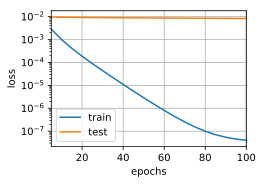

In [9]:
train(lambd=0.05)

L2 norm of w: 0.14157465


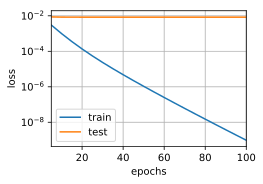

In [10]:
train(lambd=0)

L2 norm of w: 0.13761152


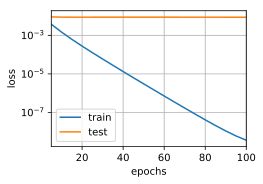

In [11]:
train(lambd=0.01)

L2 norm of w: 0.010798266


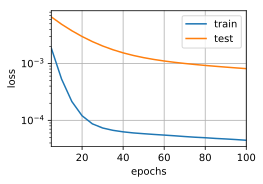

In [12]:
train(lambd=3)

L2 norm of w: 0.0073627876


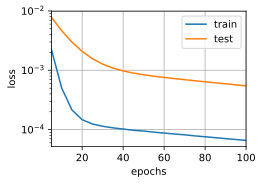

In [13]:
train(lambd=5)

L2 norm of w: 0.004733801


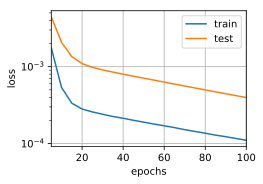

In [15]:
train(lambd=10)